# 03-01 : Data cleaning

reference: [Lecture 4: Data cleaning](https://learn.london.ac.uk/mod/page/view.php?id=111213&forceview=1)

In [1]:
import pandas as pd
from typing import List
import missingno as msno
import matplotlib.pyplot as plt

## Data Collection

In [2]:
# show the original column names
pd.read_excel(io='../../data/raw/results-for-telecommunica-2023-08-08-0844.xlsx').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 21 columns):
 #   Column                                                                                                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                               --------------  -----  
 0   Unique Response Number                                                                                                                                                                                               40 non-null     object 
 1   Introduction                                                                                                                                                          

In [3]:
# read the dataset
df_survey = pd.read_excel(
    io='../../data/raw/results-for-telecommunica-2023-08-08-0844.xlsx',
    usecols=[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18])

# assign column names
df_survey.columns = [
    'id',
    'occupation',
    'gender',
    'age',
    'education',
    'marital_status',
    'provider',
    'customer_years',
    'customer_type',
    'preferred_channel',
    'satisfaction_overall',
    'used_ai',
    'satisfaction_ai',
    'effective_ai',
    'review_date'
]

# show the first 5 rows
print(df_survey.shape)
display(df_survey.head())

(40, 15)


,id,occupation,gender,age,education,marital_status,provider,customer_years,customer_type,preferred_channel,satisfaction_overall,used_ai,satisfaction_ai,effective_ai,review_date
0,1058192-1058174-111830520,Employed,Male,35-44 years,Bachelor Degree,Married or domestic partnership,Vodacom,More than 5 years,Contract,Phone,5,Yes,3.0,Agree,01/01/2023
1,1058192-1058174-111884750,Employed,Female,35-44 years,Masters Degree/MBA or similar,Married or domestic partnership,Vodacom,More than 5 years,Hybrid,Phone,4,Yes,3.0,Neutral,16/06/2022
2,1058192-1058174-111894339,Employed,Male,45-54 years,Bachelor Degree,Divorced,Other,2-5 years,Contract,In-person,5,Yes,1.0,Disagree,15/05/2023
3,1058192-1058174-111894425,Employed,Female,25-34 years,Highschool graduate or similar,"Single, never married",Telkom,2-5 years,Contract,Email,4,Yes,3.0,Disagree,24/02/2023
4,1058192-1058174-111896371,Employed,Female,35-44 years,Highschool graduate or similar,"Single, never married",Vodacom,More than 5 years,Contract,Phone,5,No,NaN,Strongly agree,22/09/2021


## Pre-processing

In [4]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    40 non-null     object 
 1   occupation            40 non-null     object 
 2   gender                40 non-null     object 
 3   age                   40 non-null     object 
 4   education             40 non-null     object 
 5   marital_status        40 non-null     object 
 6   provider              40 non-null     object 
 7   customer_years        40 non-null     object 
 8   customer_type         40 non-null     object 
 9   preferred_channel     40 non-null     object 
 10  satisfaction_overall  40 non-null     int64  
 11  used_ai               40 non-null     object 
 12  satisfaction_ai       24 non-null     float64
 13  effective_ai          40 non-null     object 
 14  review_date           40 non-null     object 
dtypes: float64(1), int64(1), 

### Data Types

#### Set Nominal Values

In [5]:
def set_category(dataframe:pd.DataFrame, column_name:str) -> None:
    """Set the specified column to be a category type."""
    dataframe[column_name] = dataframe[column_name].astype('category')

In [6]:
set_category(df_survey, 'occupation')
set_category(df_survey, 'gender')
set_category(df_survey, 'marital_status')
set_category(df_survey, 'provider')
set_category(df_survey, 'customer_type')
set_category(df_survey, 'preferred_channel')

df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    40 non-null     object  
 1   occupation            40 non-null     category
 2   gender                40 non-null     category
 3   age                   40 non-null     object  
 4   education             40 non-null     object  
 5   marital_status        40 non-null     category
 6   provider              40 non-null     category
 7   customer_years        40 non-null     object  
 8   customer_type         40 non-null     category
 9   preferred_channel     40 non-null     category
 10  satisfaction_overall  40 non-null     int64   
 11  used_ai               40 non-null     object  
 12  satisfaction_ai       24 non-null     float64 
 13  effective_ai          40 non-null     object  
 14  review_date           40 non-null     object  
dtypes: categ

In [7]:
df_survey.preferred_channel.dtype

CategoricalDtype(categories=['Chatbot', 'Email', 'In-person', 'Phone', 'Social media'], ordered=False)

#### Set Ordinal Values

In [8]:
def set_ordinal(dataframe:pd.DataFrame, column_name:str, caregories:List[str]) -> None:
    """Set the specified column to be a ordered category type."""
    dataframe[column_name] = dataframe[column_name].astype(
        pd.CategoricalDtype(categories=caregories, ordered=True))

In [9]:
# What is your age? 
set_ordinal(df_survey, 'age', [
    'Under 18 years',
    '18-24 years',
    '25-34 years',
    '35-44 years',
    '45-54 years',
    '55-64 years',
    '65 years or older'])

# What is the highest education level you have received?
set_ordinal(df_survey, 'education', [
    'Less than high school degree',
    'Highschool graduate or similar',
    'Bachelor Degree',
    'Masters Degree/MBA or similar',
    'Doctoral Degree/PhD'])

# How long have you been a customer of your current telecommunications provider?
set_ordinal(df_survey, 'customer_years', [
    'Less than 6 months',
    '6 months to 1 year',
    '1-2 years',
    '2-5 years',
    'More than 5 years'])

# In your opinion, do AI-driven customer service tools provide personalised and effective solutions to your queries or issues? 
set_ordinal(df_survey, 'effective_ai', [
    'Strongly agree',
    'Agree',
    'Neutral',
    'Disagree',
    'Strongly disagree'])

df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    40 non-null     object  
 1   occupation            40 non-null     category
 2   gender                40 non-null     category
 3   age                   40 non-null     category
 4   education             40 non-null     category
 5   marital_status        40 non-null     category
 6   provider              40 non-null     category
 7   customer_years        40 non-null     category
 8   customer_type         40 non-null     category
 9   preferred_channel     40 non-null     category
 10  satisfaction_overall  40 non-null     int64   
 11  used_ai               40 non-null     object  
 12  satisfaction_ai       24 non-null     float64 
 13  effective_ai          40 non-null     category
 14  review_date           40 non-null     object  
dtypes: categ

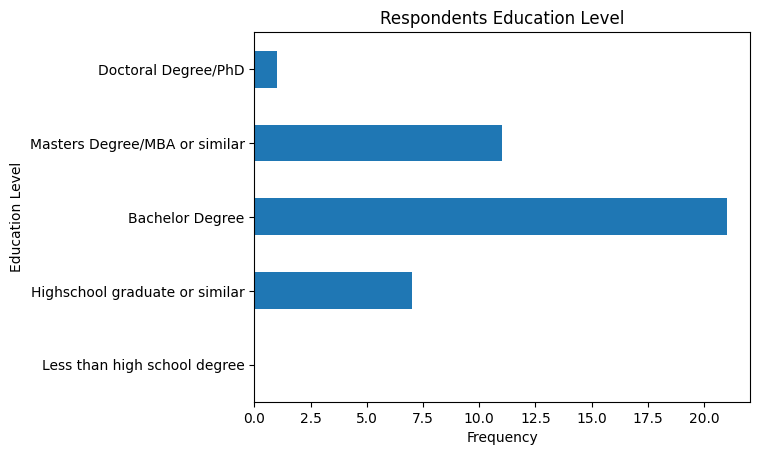

In [10]:
ax = df_survey.education.value_counts(sort=False).plot.barh()
ax.set_title('Respondents Education Level')
ax.set_xlabel('Frequency')
ax.set_ylabel('Education Level')
plt.show()

### Missing Values

<Axes: >

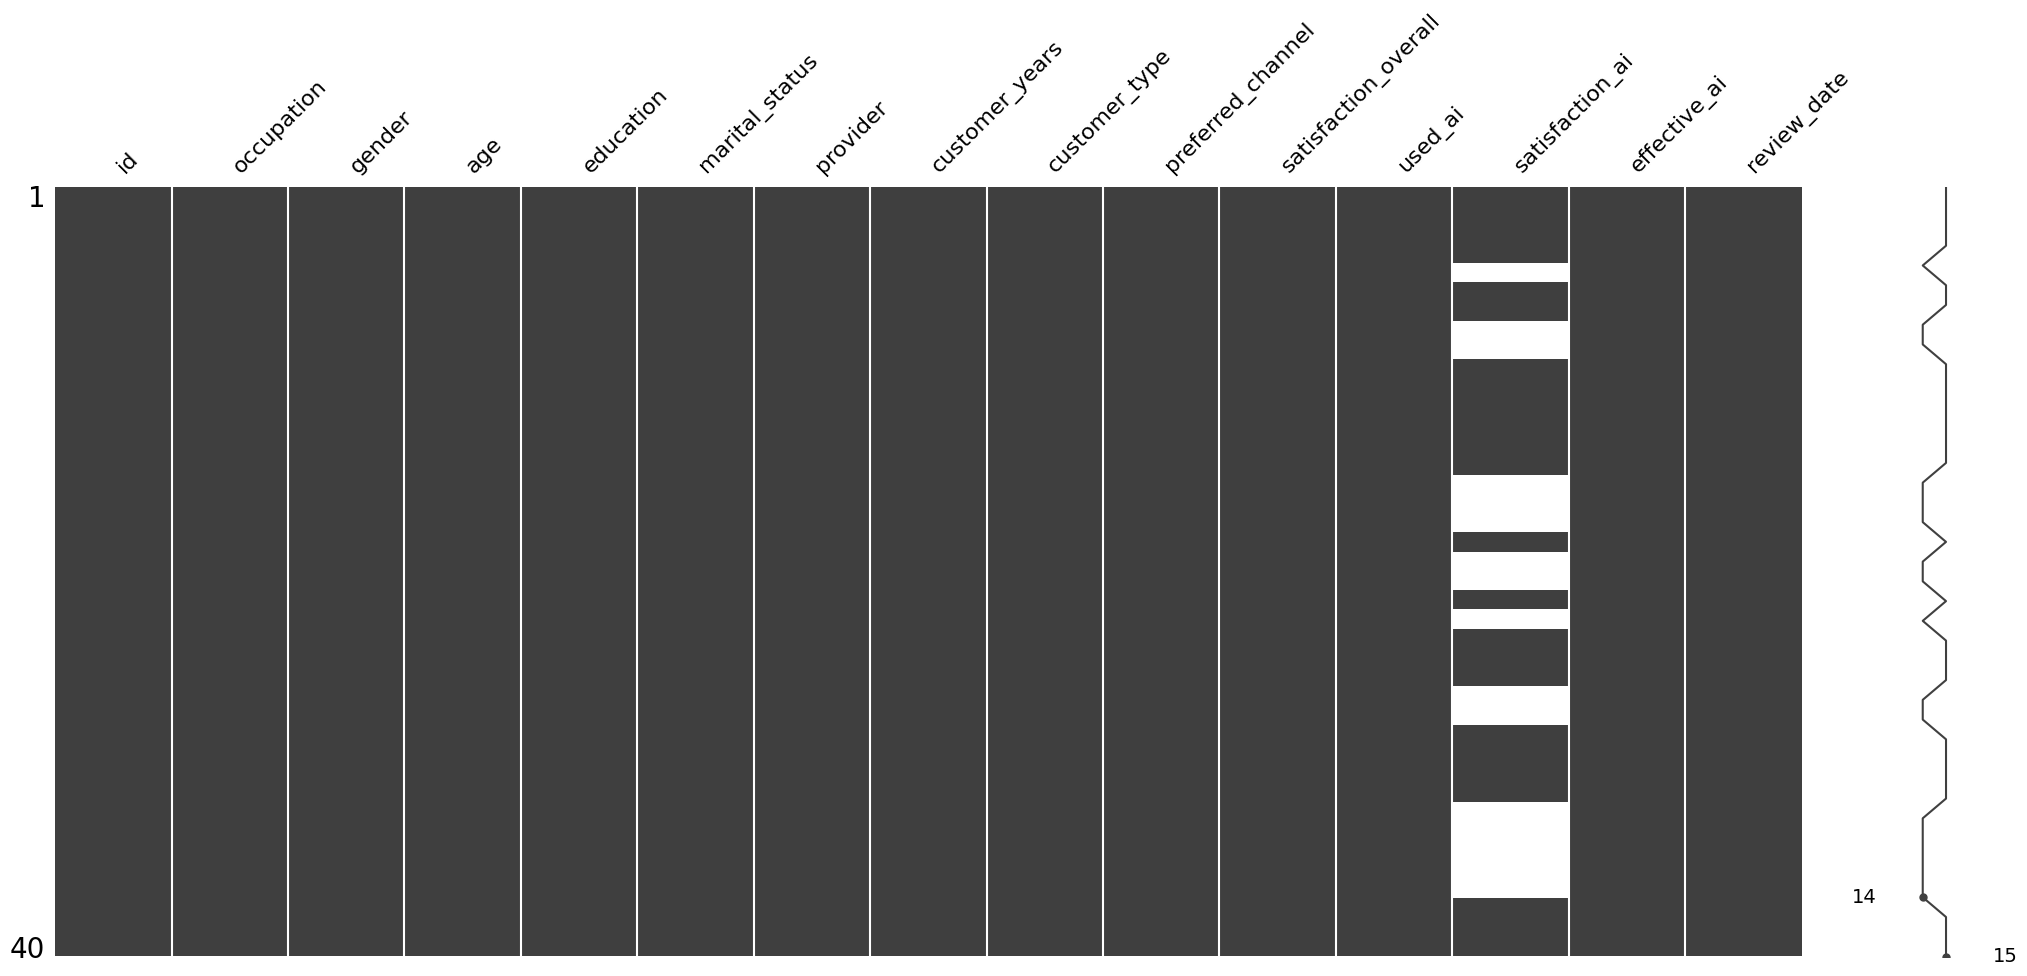

In [11]:
msno.matrix(df_survey)